<a href="https://colab.research.google.com/github/Janeth172/EDP1/blob/main/EC_CALOR_EDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuación del calor
Use los tamaños de paso:

$\textbf{a)}$ $h = 0.1$ y $k = 0.0005$

$\textbf{b)}$ $h = 0.1$ y $k = 0.01$

para aproximar la solución de la ecuación de calor
$$
\frac{\partial u}{\partial t}(x, t) - \frac{\partial^2 u}{\partial x^2}(x, t) = 0, \quad 0 < x < 1, \quad 0 \leq t,
$$
con condiciones de frontera
$$
u(0, t) = u(1, t) = 0, \quad 0 < t,
$$
y condiciones iniciales
$$
u(x, 0) = \mathrm{sen}(\pi x), \quad 0 \leq x \leq 1.
$$
Compare los resultados en $t = 0.5$ con la solución exacta
$$
u(x, t) = e^{-\pi^2 t} \mathrm{sen}(\pi x).
$$

In [16]:
import numpy as np, math, pandas as pd
import matplotlib.pyplot as plt
L=1.0; pi=math.pi

# condiciones iniciales
def u0(x): return np.sin(pi*x)

#  solución analítica
def u_exact(x,t): return np.exp(-pi**2*t)*np.sin(pi*x)

# diferencias hacia adelante
def ftcs_heat(h,k,t_final):

# malla de 0 a L paso h
    x=np.arange(0.0,L+1e-12,h);
# estabilidad
    r=k/h**2

# condiciones iniciales y de frontera
    w=u0(x); w[0]=0.0; w[-1]=0.0

# numero de pasos en t
    Nt=int(round(t_final/k))
    for _ in range(Nt):
        w_new=w.copy(); w_new[1:-1]=w[1:-1]+r*(w[2:]-2*w[1:-1]+w[:-2]); w=w_new
    return x,w,r,Nt

In [17]:
t_final=0.5; h=0.1
# comparacion de exacta y numerica
def make_df(h,k):
    x,w,r,Nt=ftcs_heat(h,k,t_final)
    import numpy as np, pandas as pd
    uex = np.exp(-np.pi**2*t_final)*np.sin(np.pi*x)
    return (pd.DataFrame({'x_i':x,'u(x_i,0.5)':np.round(uex,8) #exacta
    ,f'w_i,{Nt} (k={k})':np.round(w,8) # numerica
    ,f'u-w (k={k})':uex-w}) # error
    , r, Nt)
df_stable,r1,Nt1 = make_df(0.1,0.0005)
df_unstable,r2,Nt2 = make_df(0.1,0.01)
df_stable.head(), r1, Nt1, df_unstable.head(), r2, Nt2

(   x_i  u(x_i,0.5)  w_i,1000 (k=0.0005)  u-w (k=0.0005)
 0  0.0    0.000000             0.000000        0.000000
 1  0.1    0.002222             0.002287       -0.000064
 2  0.2    0.004227             0.004349       -0.000122
 3  0.3    0.005818             0.005986       -0.000168
 4  0.4    0.006840             0.007037       -0.000197,
 0.04999999999999999,
 1000,
    x_i  u(x_i,0.5)  w_i,50 (k=0.01)   u-w (k=0.01)
 0  0.0    0.000000         0.000000       0.000000
 1  0.1    0.002222    -30266.270026   30266.272248
 2  0.2    0.004227     60588.054981  -60588.050754
 3  0.3    0.005818    -89862.842345   89862.848163
 4  0.4    0.006840    115225.537917 -115225.531077,
 0.9999999999999998,
 50)

In [18]:
df_stable

,x_i,"u(x_i,0.5)","w_i,1000 (k=0.0005)",u-w (k=0.0005)
0,0.0,0.000000,0.000000,0.000000e+00
1,0.1,0.002222,0.002287,-6.410661e-05
2,0.2,0.004227,0.004349,-1.219380e-04
3,0.3,0.005818,0.005986,-1.678333e-04
4,0.4,0.006840,0.007037,-1.972999e-04
5,0.5,0.007192,0.007399,-2.074533e-04
6,0.6,0.006840,0.007037,-1.972999e-04
7,0.7,0.005818,0.005986,-1.678333e-04
8,0.8,0.004227,0.004349,-1.219380e-04
9,0.9,0.002222,0.002287,-6.410661e-05


In [19]:
df_unstable

,x_i,"u(x_i,0.5)","w_i,50 (k=0.01)",u-w (k=0.01)
0,0.0,0.000000,0.000000,0.000000e+00
1,0.1,0.002222,-30266.270026,3.026627e+04
2,0.2,0.004227,60588.054981,-6.058805e+04
3,0.3,0.005818,-89862.842345,8.986285e+04
4,0.4,0.006840,115225.537917,-1.152255e+05
5,0.5,0.007192,-132328.392814,1.323284e+05
6,0.6,0.006840,136478.815915,-1.364788e+05
7,0.7,0.005818,-124251.368517,1.242514e+05
8,0.8,0.004227,94976.581153,-9.497658e+04
9,0.9,0.002222,-51519.548023,5.151955e+04


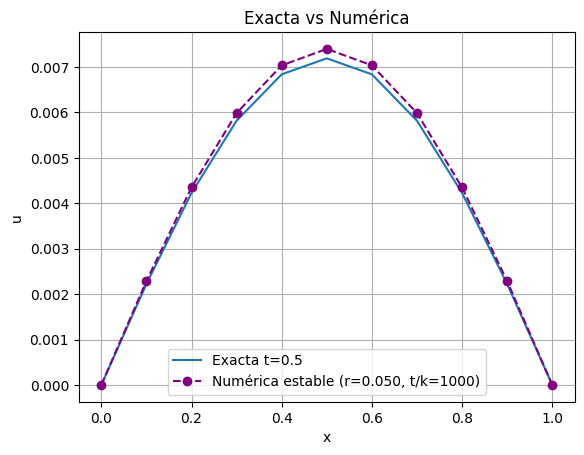

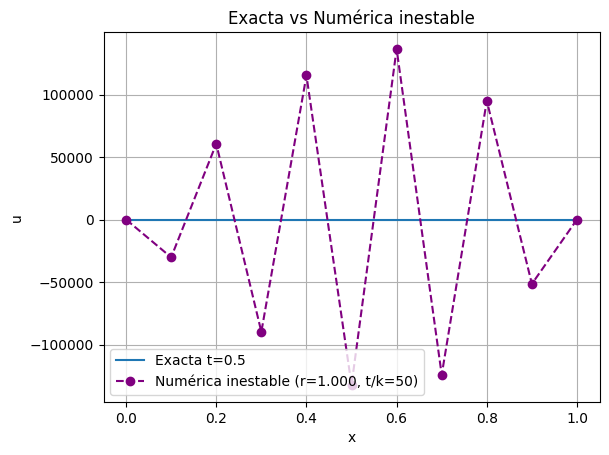

In [20]:
x=df_stable['x_i'].values
plt.figure(); plt.plot(x,df_stable['u(x_i,0.5)'].values,label='Exacta t=0.5')
plt.plot(x,df_stable.iloc[:,2].values,marker='o',linestyle='--',label=f'Numérica estable (r={r1:.3f}, t/k={Nt1})', color='purple')
plt.xlabel('x'); plt.ylabel('u'); plt.title('Exacta vs Numérica'); plt.grid(True); plt.legend(); plt.show()
x=df_unstable['x_i'].values
plt.figure(); plt.plot(x,df_unstable['u(x_i,0.5)'].values,label='Exacta t=0.5')
plt.plot(x,df_unstable.iloc[:,2].values,marker='o',linestyle='--',label=f'Numérica inestable (r={r2:.3f}, t/k={Nt2})', color='purple')
plt.xlabel('x'); plt.ylabel('u'); plt.title('Exacta vs Numérica inestable'); plt.grid(True); plt.legend(); plt.show()


**Importancia de $h$ y $k$**

La relación
$$
r = \frac{k}{h^2}
$$
determina si el esquema numérico utilizado para la ecuación del calor es estable. Cuando $r$ es lo suficientemente pequeño, los errores acumulados en cada paso de tiempo no crecen y la aproximación numérica se mantiene cercana a la solución analítica.

Por ejemplo, con $h = 0.1$ se tiene $h^2 = 0.01$:


*   Si $k = 0.0005$, entonces $r = 0.05 \leq \frac{1}{2}$ y la solución numérica es estable; los resultados coinciden bien con la solución exacta.
*   Si $k = 0.01$, entonces $r = 1 > \frac{1}{2}$ y la aproximación se vuelve inestable; los valores se desvían rápidamente y la gráfica muestra un comportamiento explosivo


En otras palabras, la estabilidad depende de mantener $k$ lo suficientemente pequeño respecto a $h^2$, y esta condición se refleja claramente tanto en las tablas de resultados como en las gráficas generadas.
